In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


37.99366999361437 37.99490497794478 37.99366999376484


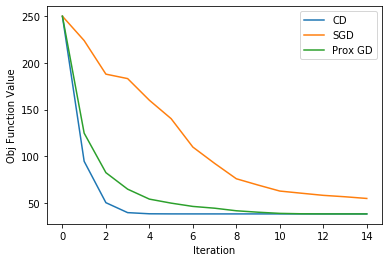

In [97]:
#  PROX GD SOLVE

import numpy as np
import random as rnd
import time as tm

from matplotlib import pyplot as plt
# SUBMIT YOUR CODE AS A SINGLE PYTHON (.PY) FILE INSIDE A ZIP ARCHIVE
# THE NAME OF THE PYTHON FILE MUST BE SUBMIT.PY
# DO NOT INCLUDE PACKAGES LIKE SKLEARN, SCIPY, KERAS ETC IN YOUR CODE
# THE USE OF ANY MACHINE LEARNING LIBRARIES FOR WHATEVER REASON WILL RESULT IN A STRAIGHT ZERO
# THIS IS BECAUSE THESE PACKAGES CONTAIN SOLVERS WHICH MAKE THIS ASSIGNMENT TRIVIAL

# DO NOT CHANGE THE NAME OF THE METHOD "solver" BELOW. THIS ACTS AS THE MAIN METHOD AND
# WILL BE INVOKED BY THE EVALUATION SCRIPT. CHANGING THIS NAME WILL CAUSE EVALUATION FAILURES


def stepLengthGenerator(mode, eta):
    if mode == "constant":
        return lambda t: eta
    elif mode == "linear":
        return lambda t: eta/(t+1)
    elif mode == "quadratic":
        return lambda t: eta/np.sqrt(t+1)

# You may define any new functions, variables, classes here
# For example, functions to calculate next coordinate or step length
def normalGD(X, y, w):
    value=2*((X.T)@(X@w-y))
    return value

def LassoGD(X, y, wHat):
    res = X.dot(wHat)-y
    GradL = (np.sign(wHat))+2*X.T.dot(res)
    return GradL

def Softhreshold(w,StepFunc,t):
    alpha = StepFunc(t)
    # alpha = stepLengthGenerator( "linear", eta )
    prox = np.zeros_like(w)
    for i in range(len(w)):
        if w[i] > alpha:
            prox[i] = w[i]-alpha
        elif w[i] < -alpha:
            prox[i] = w[i]+alpha
        else:
            prox[i] = 0
    return prox

def DoGD(X,y,w,stepFunc,t):
    g = LassoGD(X, y, w)
    w = w-stepFunc(t)*g
    return w

def DoProxGD(X,y,w,StepFunc,t):
    g=normalGD(X,y,w)
    alpha = StepFunc(t)
    w_new=Softhreshold(w-alpha*g,StepFunc,t)
    return w_new

def DoCD(X,y,w,StepFunc,t):
    alpha = 1
    (n, d) = X.shape
    (n, d) = X.shape
    z  = np.sum(X**2,axis=0)
    # used 'a' for random permutation CD 
    a = np.random.permutation(d)
    pho=np.zeros(d)
    z=np.zeros(d)
    for j in range(d):
        j = a[j]
        Xj = X[:,j]   
        for i in range(n):
          pho[j]=pho[j]+Xj[i]*(y[i]-w@X[i,:]+w[j]*X[i,j])
          z[j]=z[j]+pow(X[i,j],2)
        if pho[j] < -alpha/2:
            w[j] = (pho[j] + alpha/2)/z[j]
        elif pho[j] > alpha/2:
            w[j] = (pho[j] - alpha/2)/z[j]
        else:
            w[j] = 0
    # z  = np.sum(X**2,axis=0)
    # # used 'a' for random permutation CD 
    # a = np.random.permutation(d)
    # for j in range(d):
    #     # pho = 0
    #     j = a[j]
    #     Xj = X[:,j]
    #     res = y-X.dot(w)+w[j]*Xj
    #     pho = Xj.T.dot(res)
    #     g = -2*pho + 2*w[j]*z[j]+alpha*np.sign(w[j])
    #     w[j] = w[j]-StepFunc(t)*g 
    return w     
   

def getObjValue(X, y, wHat):
    lassoLoss = np.linalg.norm(wHat, 1) + pow(np.linalg.norm(X.dot(wHat) - y, 2), 2)
    return lassoLoss
################################
# Non Editable Region Starting #
################################


def solver(X, y, timeout, spacing, eta,index):
    (n, d) = X.shape
    t = 0
    totTime = 0

    # w is the model vector and will get returned once timeout happens
    # w = 1.5*np.ones((d,))
    w = np.zeros((d,))
    tic = tm.perf_counter()
################################
#  Non Editable Region Ending  #
################################
    # You may reinitialize w to your liking here
    # You may also define new variables here e.g. step_length, mini-batch size etc
    # eta = 5e-3
    # takes time around 10
    if index==1:
      global tm_pr
      tm_pr=[]

    if index==2: 
      global tm_sgd
      tm_sgd=[]

    if index==3:
      global tm_cd
      tm_cd=[]
    # global objValseries_pr
    # global objValseries_sgd
    # global objValseries_cd 
    # objValseries_pr = []
    # objValseries_sgd=[]
    # objValseries_cd =[]
    global objValseries
    objValseries=[]


    if index==1:
      stepFunc = stepLengthGenerator( "constant", eta )
    if index==2:
      stepFunc=  stepLengthGenerator( "quadratic", eta)
    if index==3:
      stepFunc=  stepLengthGenerator( "constant", eta )


################################
# Non Editable Region Starting #
################################
    while True:
        t = t + 1
        if t % spacing == 0:
            toc = tm.perf_counter()
            totTime = totTime + (toc - tic)
            if totTime > timeout:
                return (w, totTime, objValseries)
            else:
                tic = tm.perf_counter()
################################
#  Non Editable Region Ending  #
################################

        if index==1:
          tm_pr=np.append(tm_pr,totTime)
          objValseries = np.append(objValseries,getObjValue(X,y,w))
          # print("1")
          w = DoProxGD(X,y,w,stepFunc,t)

        elif index==2:
          tm_sgd=np.append(tm_sgd,totTime)
          objValseries = np.append(objValseries,getObjValue(X,y,w))
          # print("2")
          w= DoGD(X,y,w,stepFunc,t )

        elif index==3:
          tm_cd=np.append(tm_cd,totTime)
          objValseries = np.append(objValseries,getObjValue(X,y,w))
          # print("3")
          w = DoCD(X,y,w,stepFunc,t)
        
    # Write all code to perform your method updates here within the infinite while loop
    # The infinite loop will terminate once timeout is reached
    # Do not try to bypass the timer check e.g. by using continue
    # It is very easy for us to detect such bypasses which will be strictly penalized

    # Please note that once timeout is reached, the code will simply return w
    # Thus, if you wish to return the average model (as is sometimes done for GD),
    # you need to make sure that w stores the average at all times
    # One way to do so is to define a "running" variable w_run
    # Make all GD updates to w_run e.g. w_run = w_run - step * delw
    # Then use a running average formula to update w
    # w = (w * (t-1) + w_run)/t
    # This way, w will always store the average and can be returned at any time
    # In this scheme, w plays the role of the "cumulative" variable in the course module optLib
    # w_run on the other hand, plays the role of the "theta" variable in the course module optLib
    # print("yes")

    return (w, totTime, objValseries1)  # This return statement will never be reached


eta=np.array([0.08854545454545454,.115,1])

traindata = np.loadtxt( "/content/drive/My Drive/assn1/train" )
wAst = np.loadtxt( "/content/drive/My Drive/assn1 (1)/assn1/wAstTrain" )

y = traindata[:,0]
X = traindata[:,1:]

for i in range(1):
    
    (w_pr,totTime_pr,objValseries_pr)=solver(X,y,10,1,eta[0],1)
    (w_sgd,totTime_sgd,objValseries_sgd)=solver(X,y,10,1,eta[1],2)
    (w_cd,totTime_cd,objValseries_cd)=solver(X,y,100,1,eta[2],3)

    wreduce_idx_pr = np.argsort( np.abs(w_pr) )[0:979]
    wreduce_idx_sgd = np.argsort( np.abs(w_sgd) )[0:979]
    wreduce_idx_cd = np.argsort( np.abs(w_cd) )[0:979]
    w_pr[wreduce_idx_pr] = 0
    w_sgd[wreduce_idx_sgd] = 0
    w_cd[wreduce_idx_cd] = 0


    ObjCal_pr = getObjValue(X,y,w_pr)
    ObjCal_sgd = getObjValue(X,y,w_sgd)
    ObjCal_cd = getObjValue(X,y,w_cd)


# removing the remaining indices from w
# w1 = w
# np.put(w1,wsparse_idx,np.zeros(20))
#
# wsparse = w - w1
# print (w)
    
    # norm1 = np.linalg.norm(w,2)
    # normBest = np.linalg.norm(wAst,2)
    
    # if np.abs(ObjValBest-ObjCal) < min1:
    #     min1 =  np.abs(ObjValBest-ObjCal)
    #     eta_cr_o = eta[i]
    #     ObjCal1 = ObjCal
    
    # if np.abs(norm1 - normBest) < min2:
    #     min2 = np.abs(norm1 - normBest)
    #     eta_cr = eta[i]
    
    # idxAst = np.abs(wAst).argsort()[::-1][:k]
    # idxHat = np.abs(w).argsort()[::-1][:k]
    # a = np.zeros_like( wAst )
    # a[idxAst] = 1
    # b = np.zeros_like( wAst )
    # b[idxHat] = 1
    # min3 = np.linalg.norm( a - b, 1 )//2
    # # print (normBest,norm1)
    # # print (ObjValBest,objValseries[-1])
    # print (i)

print (ObjCal_pr,ObjCal_sgd,ObjCal_cd)

# Plot the objective value function
# plt.figure()
# plt.plot(tm_pr,objValseries_pr)
# plt.plot(tm_sgd,objValseries_sgd)
# plt.plot(tm_cd,objValseries_cd)

# plt.ylabel("Obj Function Value")
# plt.xlabel("Time")

# # plt.show()

fig = plt.figure()
ax = plt.subplot(111)
# ax.plot(tm_cd,objValseries_cd,label='CD')
# ax.plot(tm_sgd,objValseries_sgd,label='SGD')
# ax.plot(tm_pr,objValseries_pr,label='Prox GD')
ax.plot(objValseries_cd[0:15],label='CD')
ax.plot(objValseries_sgd[0:15],label='SGD')
ax.plot(objValseries_pr[0:15],label='Prox GD')
ax.legend()
plt.ylabel("Obj Function Value")
plt.xlabel("Iteration")

plt.show()


In [98]:
print(objValseries_cd[0:15])

[250.13862428  94.4336176   50.03872535  39.36049096  38.11182956
  38.00027835  37.9826707   37.97755044  37.97695636  37.97674623
  37.97667461  37.97665432  37.97664845  37.97664604  37.97664581]


In [81]:
objValseries_cd.shape

(2,)

In [3]:
np.linalg.norm(w-wAst)

2.8936527894824535

In [0]:
import random as rnd


3.0 41.43118603949811


ValueError: ignored

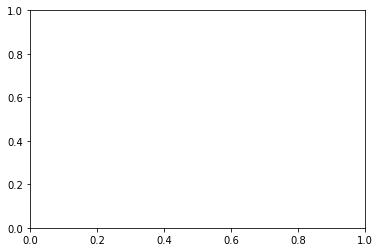

In [41]:
# Coordinate Descent
# from matplotlib import pyplot as plt
# SUBMIT YOUR CODE AS A SINGLE PYTHON (.PY) FILE INSIDE A ZIP ARCHIVE
# THE NAME OF THE PYTHON FILE MUST BE SUBMIT.PY
# DO NOT INCLUDE PACKAGES LIKE SKLEARN, SCIPY, KERAS ETC IN YOUR CODE
# THE USE OF ANY MACHINE LEARNING LIBRARIES FOR WHATEVER REASON WILL RESULT IN A STRAIGHT ZERO
# THIS IS BECAUSE THESE PACKAGES CONTAIN SOLVERS WHICH MAKE THIS ASSIGNMENT TRIVIAL
# DO NOT CHANGE THE NAME OF THE METHOD "solver" BELOW. THIS ACTS AS THE MAIN METHOD AND
# WILL BE INVOKED BY THE EVALUATION SCRIPT. CHANGING THIS NAME WILL CAUSE EVALUATION FAILURES


def stepLengthGenerator(mode, eta):
    if mode == "constant":
        return lambda t: eta
    elif mode == "linear":
        return lambda t: eta/(t+1)
    elif mode == "quadratic":
        return lambda t: eta/np.sqrt(t+1)

# You may define any new functions, variables, classes here
# For example, functions to calculate next coordinate or step length
def LassoGD(X, y, wHat):
    res = X.dot(wHat)-y
    GradL = (np.sign(wHat))+2*X.T.dot(res)
    return GradL

def Softhreshold_CD(w,stepFunc,t):
    # alpha = stepFunc(t)
    # alpha = stepLengthGenerator( "linear", eta )
    prox = np.zeros_like(w)
    for i in range(len(w)):
        if w[i] > alpha:
            prox[i] = w[i]-alpha
        elif w[i] < -alpha:
            prox[i] = w[i]+alpha
        else:
            prox[i] = 0
    return prox

def DoGD(X,y,w,stepFunc,t):
    
    # B=50
    # n=X.shape[0]
    # # global v_prev
    # # if t==1:
    # #   v_prev=0
    # # v_curr=0.1*v_prev+stepFunc(t)*g
    # # w = w-v_curr
    # # v_prev=v_curr
    # # w=w-stepFunc(t)*g
    # B_eff = min( B, n )
    # samples = rnd.sample( range(0, n), B_eff )
    # X_ = X[samples,:]
    # y_ = y[samples]
    g = LassoGD(X, y, w)
    w=w-stepFunc(t)*g
    return w

def DoProxGD(X,y,w,stepFunc,t):
    res = X.dot(w)-y
    wp = w-stepFunc(t)*X.T.dot(res)
    prox1 = Softhreshold(wp,stepFunc,t)
    return prox1

def DoCD(X,y,w,StepFunc,t):
    alpha = 1
    (n, d) = X.shape
    z  = np.sum(X**2,axis=0)
    # used 'a' for random permutation CD 
    a = np.random.permutation(d)
    pho=np.zeros(d)
    z=np.zeros(d)
    for j in range(d):
        # print(1)
        # pho = 0
        j = a[j]
        Xj = X[:,j]   
        # res = y-X.dot(w)+w[j]*Xj
        # pho[j] = Xj.T.dot(res)
        for i in range(n):
          pho[j]=pho[j]+Xj[i]*(y[i]-w@X[i,:]+w[j]*X[i,j])
          z[j]=z[j]+pow(X[i,j],2)
            # if i!=j:
            #     pho[j] = pho[j] + X[i][j]*(y[i]-y[i]*w[j])
            # else:
            #     pho = pho + X[i][j]*y[i]
        if pho[j] < -alpha/2:
            w[j] = (pho[j] + alpha/2)/z[j]
        elif pho[j] > alpha/2:
            w[j] = (pho[j] - alpha/2)/z[j]
        else:
            w[j] = 0
        # g = -2*pho + 2*w[j]*z[j]+alpha*np.sign(w[j])
        # w[j] = w[j]-StepFunc(t)*g 
    # alpha = 1
    # (n, d) = X.shape
    # z  = np.sum(X**2,axis=0)
    # # used 'a' for random permutation CD 
    # a = np.random.permutation(d)
    # for j in range(d):
    #     # pho = 0
    #     j = a[j]
    #     Xj = X[:,j]
    #     res = y-X.dot(w)+w[j]*Xj
    #     pho = Xj.T.dot(res)
    #     g = -2*pho + 2*w[j]*z[j]+alpha*np.sign(w[j])
    #     w[j] = w[j]-StepFunc(t)*g 
    # return w     
    return w     

    # gt =
    # w[i]=w[i]-StepFunc(t)*gt
    # np.put(w,i,w[i])

def getObjValue(X, y, wHat):
    lassoLoss = np.linalg.norm(wHat, 1) + pow(np.linalg.norm(X.dot(wHat) - y, 2), 2)
    return lassoLoss
################################
# Non Editable Region Starting #
################################


def solver(X, y, timeout, spacing,t):
    (n, d) = X.shape
    t = 0
    totTime = 0

    # w is the model vector and will get returned once timeout happens
    # w = 1.5*np.ones((d,))
    w = np.zeros((d,))
    tic = tm.perf_counter()
################################
#  Non Editable Region Ending  #
################################
    # You may reinitialize w to your liking here
    # You may also define new variables here e.g. step_length, mini-batch size etc
    # eta = 5e-3
    # takes time around 10
    
    # eta = 0.01
    # above value and quadratic for GD
    # allowed to take such large step?
    eta = 0.115
    # eta=.091
    # above value and linear for CD 
    # B = 100
    # GD works well with quadratic step function
    stepFunc = stepLengthGenerator( "quadratic", eta )
    global tm2
    tm2=[]  
    # coordinateGenerator(mode, d)

    # w = np.ones((d,))
    objValseries = []
################################
# Non Editable Region Starting #
################################
    while True:
        t = t + 1
        if t % spacing == 0:
            toc = tm.perf_counter()
            totTime = totTime + (toc - tic)
            if totTime > timeout:
                return (w, totTime, objValseries3)
            else:
                tic = tm.perf_counter()
################################
#  Non Editable Region Ending  #
################################

        # w = DoProxGD(X,y,w,stepFunc,t)
        # if totTime< timeout:
        #   print("yes")
        #   print (totTime)
        #   print(timeout)
        tm2=np.append(tm2,totTime)
        objValseries = np.append(objValseries,getObjValue(X,y,w))
        w = DoGD(X,y,w,stepFunc,t)

        # w = DoCD(X,y,w,stepFunc,t)
        # print(totTime)
        
    # Write all code to perform your method updates here within the infinite while loop
    # The infinite loop will terminate once timeout is reached
    # Do not try to bypass the timer check e.g. by using continue
    # It is very easy for us to detect such bypasses which will be strictly penalized

    # Please note that once timeout is reached, the code will simply return w
    # Thus, if you wish to return the average model (as is sometimes done for GD),
    # you need to make sure that w stores the average at all times
    # One way to do so is to define a "running" variable w_run
    # Make all GD updates to w_run e.g. w_run = w_run - step * delw
    # Then use a running average formula to update w
    # w = (w * (t-1) + w_run)/t
    # This way, w will always store the average and can be returned at any time
    # In this scheme, w plays the role of the "cumulative" variable in the course module optLib
    # w_run on the other hand, plays the role of the "theta" variable in the course module optLib

    return (w, totTime, objValseries3)  # This return statement will never be reached


traindata = np.loadtxt( "/content/drive/My Drive/assn1/train" )
wAst = np.loadtxt( "/content/drive/My Drive/assn1 (1)/assn1/wAstTrain" )
# wAst = np.loadtxt( "wAstTrain" )
k = 20
# objValseries = []
Y = traindata[:,0]
X = traindata[:,1:]

# ObjValBest = getObjValue(X,y,wAst)

(w,totTime,objValseries3)=solver(X,y,.1,1,1)
# print (w)
wsparse_idx = np.argsort( np.abs(w) )[::-1][:20]
w2 = w[wsparse_idx]
    
wreduce_idx = np.argsort( np.abs(w) )[0:799]
w[wreduce_idx] = 0
ObjCal = getObjValue(X,y,w)
    
norm1 = np.linalg.norm(w,2)
normBest = np.linalg.norm(wAst,2)
    
idxAst = np.abs(wAst).argsort()[::-1][:k]
idxHat = np.abs(w).argsort()[::-1][:k]
a = np.zeros_like( wAst )
a[idxAst] = 1
b = np.zeros_like( wAst )
b[idxHat] = 1
diff_ind = np.linalg.norm( a - b, 1 )//2

print (diff_ind,ObjCal)
# print (w)


#######################################

# Plot the objective value function
# plt.figure(1)
fig = plt.figure()
ax = plt.subplot(111)
# ax.plot(tm3,objValseries3,label='CD')
ax.plot(tm2,objValseries,label='SGD')
# ax.plot(tm1,objValseries1,label='Prox GD')
ax.legend()
plt.ylabel("Obj Function Value")
plt.xlabel("Time")

plt.show()
# plt.hold(True)
# bJw9dPi8bZPSCTM

In [15]:
totTime

0.10322410400021909

In [0]:
w

In [37]:
# Tuning of eta
import numpy as np
import random as rnd
import time as tm

from matplotlib import pyplot as plt
# SUBMIT YOUR CODE AS A SINGLE PYTHON (.PY) FILE INSIDE A ZIP ARCHIVE
# THE NAME OF THE PYTHON FILE MUST BE SUBMIT.PY
# DO NOT INCLUDE PACKAGES LIKE SKLEARN, SCIPY, KERAS ETC IN YOUR CODE
# THE USE OF ANY MACHINE LEARNING LIBRARIES FOR WHATEVER REASON WILL RESULT IN A STRAIGHT ZERO
# THIS IS BECAUSE THESE PACKAGES CONTAIN SOLVERS WHICH MAKE THIS ASSIGNMENT TRIVIAL

# DO NOT CHANGE THE NAME OF THE METHOD "solver" BELOW. THIS ACTS AS THE MAIN METHOD AND
# WILL BE INVOKED BY THE EVALUATION SCRIPT. CHANGING THIS NAME WILL CAUSE EVALUATION FAILURES


def stepLengthGenerator(mode, eta):
    if mode == "constant":
        return lambda t: eta
    elif mode == "linear":
        return lambda t: eta/(t+1)
    elif mode == "quadratic":
        return lambda t: eta/np.sqrt(t+1)

# You may define any new functions, variables, classes here
# For example, functions to calculate next coordinate or step length
def normalGD(X, y, w):
    value=2*((X.T)@(X@w-y))
    return value

def LassoGD(X, y, wHat):
    res = X.dot(wHat)-y
    GradL = (np.sign(wHat))+2*X.T.dot(res)
    return GradL

def Softhreshold(w,StepFunc,t):
    alpha = StepFunc(t)
    # alpha = stepLengthGenerator( "quadratic", eta )
    prox = np.zeros_like(w)
    for i in range(len(w)):
        if w[i] > alpha:
            prox[i] = w[i]-alpha
        elif w[i] < -alpha:
            prox[i] = w[i]+alpha
        else:
            prox[i] = 0
    return prox

def DoGD(X,y,w,stepFunc,t):
    g = LassoGD(X, y, w)
    w = w-stepFunc(t)*g
    return w

def DoProxGD(X,y,w,StepFunc,t):
    g=normalGD(X,y,w)
    alpha = StepFunc(t)
    w_new=Softhreshold(w-alpha*g,StepFunc,t)
    return w_new

def DoCD(X,y,w,StepFunc,t):
    alpha = 1
    (n, d) = X.shape
    z  = np.sum(X**2,axis=0)
    # used 'a' for random permutation CD 
    a = np.random.permutation(d)
    for j in range(d):
        # pho = 0
        # j = a[j]
        Xj = X[:,j]
        res = y-X.dot(w)+w[j]*Xj
        pho = Xj.T.dot(res)
        g = -2*pho + 2*w[j]*z[j]+alpha*np.sign(w[j])
        w[j] = w[j]-StepFunc(t)*g 
    return w     
    # gt =
    # w[i]=w[i]-StepFunc(t)*gt
    # np.put(w,i,w[i])

def getObjValue(X, y, wHat):
    lassoLoss = np.linalg.norm(wHat, 1) + pow(np.linalg.norm(X.dot(wHat) - y, 2), 2)
    return lassoLoss
################################
# Non Editable Region Starting #
################################


def solver(X, y, timeout, spacing, eta):
    (n, d) = X.shape
    t = 0
    totTime = 0

    # w is the model vector and will get returned once timeout happens
    # w = 1.5*np.ones((d,))
    w = np.zeros((d,))
    tic = tm.perf_counter()
################################
#  Non Editable Region Ending  #
################################
    # You may reinitialize w to your liking here
    # You may also define new variables here e.g. step_length, mini-batch size etc
    # eta = 5e-3
    # takes time around 10
    
    # eta = 0.01
    # above value and quadratic for GD
    # allowed to take such large step?
    
    # eta = 0.32
    # above value and linear for CD 
    
    B = 100
    # GD works well with quadratic step function
    stepFunc = stepLengthGenerator( "quadratic", eta )

    # coordinateGenerator(mode, d)

    # w = np.ones((d,))
    objValseries = []
################################
# Non Editable Region Starting #
################################
    while True:
        t = t + 1
        if t % spacing == 0:
            toc = tm.perf_counter()
            totTime = totTime + (toc - tic)
            if totTime > timeout:
                return (w, totTime, objValseries)
            else:
                tic = tm.perf_counter()
################################
#  Non Editable Region Ending  #
################################

        w = DoGD(X,y,w,stepFunc,t)
        # w = DoProxGD(X,y,w,stepFunc,t)
        # w = DoCD(X,y,w,stepFunc,t)

        objValseries = np.append(objValseries,getObjValue(X,y,w))
    # Write all code to perform your method updates here within the infinite while loop
    # The infinite loop will terminate once timeout is reached
    # Do not try to bypass the timer check e.g. by using continue
    # It is very easy for us to detect such bypasses which will be strictly penalized

    # Please note that once timeout is reached, the code will simply return w
    # Thus, if you wish to return the average model (as is sometimes done for GD),
    # you need to make sure that w stores the average at all times
    # One way to do so is to define a "running" variable w_run
    # Make all GD updates to w_run e.g. w_run = w_run - step * delw
    # Then use a running average formula to update w
    # w = (w * (t-1) + w_run)/t
    # This way, w will always store the average and can be returned at any time
    # In this scheme, w plays the role of the "cumulative" variable in the course module optLib
    # w_run on the other hand, plays the role of the "theta" variable in the course module optLib

    return (w, totTime, objValseries)  # This return statement will never be reached



# cross-validation
k_f=10
idx=np.arange(800)
data = np.loadtxt( "/content/drive/My Drive/assn1/train" )
wAst = np.loadtxt( "/content/drive/My Drive/assn1 (1)/assn1/wAstTrain" )
k = 20
N = 100
eta = np.linspace(0.01,0.2,N)
# eta=[0.246]
# objValseries = []
# y = data[:,0]
# X = data[:,1:]
splits=np.split(idx, k_f)
# w_f=w_0
val_f=np.ones(6)

min3 = 1000

for j in range(100):
  
  Y_err = 0

  for i in range(k_f):
    
    X_test=X[splits[i]]
    X_train=X[~np.isin(idx,splits[i])]
    y_test=y[splits[i]]
    y_train=y[~np.isin(idx,splits[i])]


    # N = 100
    # eta = np.linspace(0.1,0.34,N)
    # # eta = [0.5]
    # eta = [0.376]
    # eta=[0.06]
    # eta =0.04 constant 37 1
    # eta 0.3 linear 2 41

    ObjValBest = getObjValue(X,y,wAst)

    # Tuning eta
    # min1 = 1000
    # min2 = 1000

    (w,totTime,objValseries)=solver(X_train,y_train,0.1,1,eta[j])
    # print (w)

    # wsparse_idx = np.argsort( np.abs(w) )[::-1][:20]
    # w2 = w[wsparse_idx]

    wreduce_idx = np.argsort( np.abs(w) )[0:979]
    w[wreduce_idx] = 0

    ObjTest = getObjValue(X_test,y_test,w)
    Y_err = Y_err + np.linalg.norm(X_test.dot(w)-y_test)



  if Y_err < min3:
    min3 = Y_err
    eta_cr = eta[j]
    Y_cr = Y_err
  # ObjCal = getObjValue(X,y,w)
  # removing the remaining indices from w
  # w1 = w
  # np.put(w1,wsparse_idx,np.zeros(20))
  #
  # plt.plot(objValseries)
  print(Y_err,eta[j])
  # plt.show()
  # wsparse = w - w1
  print (j)

print(eta_cr,min3)
#   norm1 = np.linalg.norm(w,2)
#   normBest = np.linalg.norm(wAst,2)

#   if np.abs(ObjValBest-ObjCal) < min1:
#     min1 =  np.abs(ObjValBest-ObjCal)
#     eta_cr_o = eta[i]
#     ObjCal1 = ObjCal

#   if np.abs(norm1 - normBest) < min2:
#     min2 = np.abs(norm1 - normBest)
#     eta_cr = eta[i]

#   idxAst = np.abs(wAst).argsort()[::-1][:k]
#   idxHat = np.abs(w).argsort()[::-1][:k]
#   a = np.zeros_like( wAst )
#   a[idxAst] = 1
#   b = np.zeros_like( wAst )
#   b[idxHat] = 1
#   min3 = np.linalg.norm( a - b, 1 )//2
#   # print (normBest,norm1)
#   # print (ObjValBest,objValseries[-1])
#   print (i)

# print (eta_cr,eta_cr_o,min1,min2,min3,ObjCal1)

# # Plot the objective value function
# plt.plot(objValseries)
# plt.show()

# bJw9dPi8bZPSCTM







26.99755212111683 0.01
0
24.686000056513507 0.01191919191919192
1
23.000719083197545 0.013838383838383839
2
21.896135062180917 0.01575757575757576
3
20.280782515197213 0.017676767676767676
4
19.755846121342255 0.019595959595959597
5
18.878226982272224 0.021515151515151515
6
18.17057633380754 0.023434343434343433
7
17.589044196251443 0.025353535353535354
8
16.927854329043306 0.027272727272727275
9
16.402327797096483 0.029191919191919193
10
16.465736891015553 0.03111111111111111
11
15.735336198985369 0.03303030303030303
12
15.707375641805642 0.03494949494949495
13
15.526658147332684 0.03686868686868687
14
15.279941795226348 0.03878787878787879
15
15.194421839237567 0.040707070707070706
16
14.956937621525272 0.04262626262626263
17
14.652981445132934 0.04454545454545455
18
14.717627531331374 0.046464646464646465
19
14.585612430658534 0.04838383838383838
20
14.54872657556696 0.05030303030303031
21
14.3431982919311 0.052222222222222225
22
14.38642046578327 0.05414141414141414
23
14.315430435

In [0]:
print()

15.55549578433654


In [32]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape) #get (numer of rows, number of columns or 'features')
print(boston.DESCR) #get a description of the dataset
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data.head()
#For some reason, the loaded data does not include the target variable (MEDV), we add it here
data['MEDV'] = pd.Series(data=boston.target, index=data.index)
data.describe() #get some basic stats on the dataset

(506, 13)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - P

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [0]:
#Load the independent variables (the x1, x2, etc.) into a dataframe object called 'X'. Similarly for the dependent variable 'Y'
X = data.drop('MEDV', axis = 1) #define independent predictor set (excluding the dependent variable)
Y = data['MEDV'] #define the target values (i.e. the dependent variable)

In [49]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha=1,fit_intercept=False) #a higher value of alpha restricts the coefficients further
ls.fit(X,Y)

Lasso(alpha=1, copy_X=True, fit_intercept=False, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [50]:
print('Intercept: ',ls.intercept_) # This gives us the intercept term
print('Coefficients: \n',ls.coef_) # This gives us the coefficients (in the case of this model, just one coefficient)

Intercept:  0.0
Coefficients: 
 [-0.05447639  0.04807717  0.          0.          0.          4.10641268
  0.03181277 -0.27104961  0.09063498 -0.00692123 -0.08497132  0.01601536
 -0.55817918]


In [51]:
X.shape

(506, 13)

In [0]:

# bJw9dPi8bZPSCTM